In [6]:
import numpy as np
import lightkurve as lk
from vetting import centroid_test

In [2]:
# from model 
# https://drive.google.com/drive/folders/147fTY30M_TW7Z48y26LJJKhXM8_biDei
tic, sector = 173002823, [21, 48]
t0=2621.0300840
duration=4.3685156 / 24
period=23.08


In [7]:
download_dir = "../../data"

sr = lk.search_targetpixelfile(f"TIC {tic}", mission='TESS', sector=sector, cadence="short")
tpfs_all = sr.download_all(download_dir=download_dir)
print("TIC sector cadence(min), num. cadence")
for t in tpfs_all:
    print(f"TIC {t.targetid}", t.sector, f"{(np.median(np.diff(t.time.value)) * 24 * 60):.0f}", len(t))

TIC sector cadence(min), num. cadence
TIC 173002823 21 2 18758
TIC 173002823 48 2 18989


In [26]:
tpfs = tpfs_all[:]  # no more filtering needed
tpfs_nm = tpfs  # a copy of tpfs with no time masking

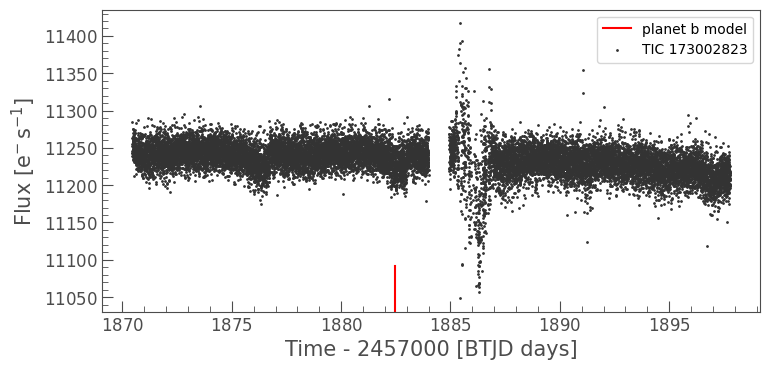

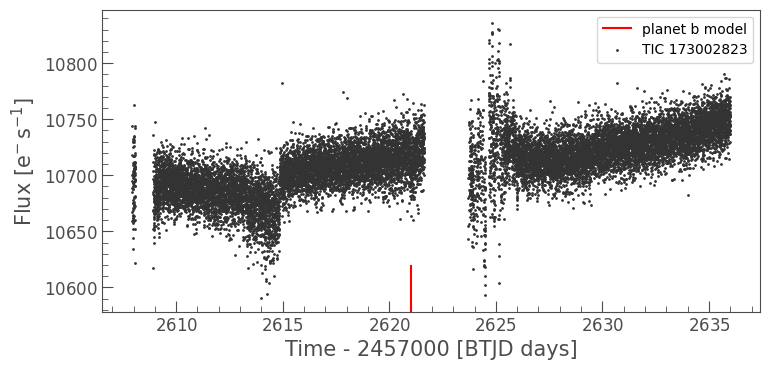

In [25]:
axs = [tpf.to_lightcurve().remove_outliers(sigma=5).scatter() for tpf in tpfs]
axs[0].axvline(t0 - period * 32, c='red', ymax=0.15, label="planet b model")
axs[-1].axvline(t0, c='red', ymax=0.15, label="planet b model");
[ax.legend() for ax in axs];

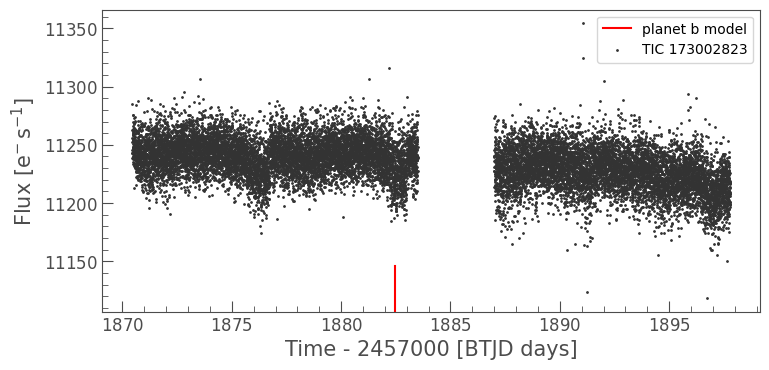

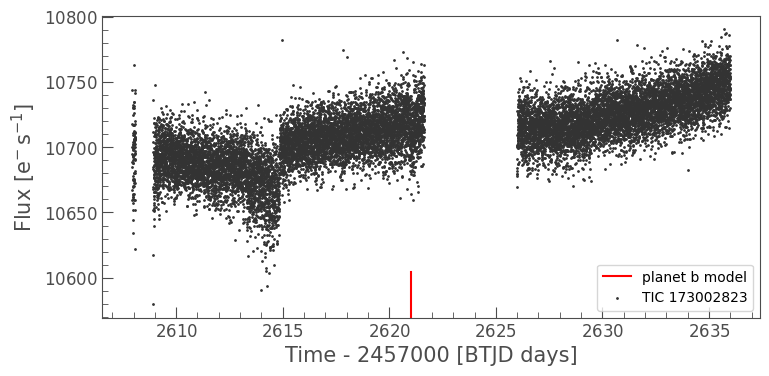

In [30]:
# mask out cadences with wild fluxes, in case they make the comparison weaker
# (e.g., they might make inflate the out-of-transit centroid variations)
# (it turns out make no noticeable difference)
tpfs = lk.TargetPixelFileCollection([
    tpfs_nm[0][(tpfs_nm[0].time.value < 1883.5) | (tpfs_nm[0].time.value > 1887)], 
    tpfs_nm[1][(tpfs_nm[1].time.value < 2623.5) | (tpfs_nm[1].time.value > 2626)]
])

axs = [tpf.to_lightcurve().remove_outliers(sigma=7).scatter() for tpf in tpfs]
axs[0].axvline(t0 - period * 32, c='red', ymax=0.15, label="planet b model")
axs[-1].axvline(t0, c='red', ymax=0.15, label="planet b model");
[ax.legend() for ax in axs];

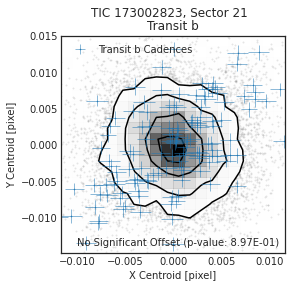

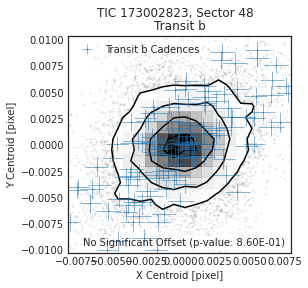

In [31]:
# if p-value is < 0.05 (5%), it means signficant centroid offset
# - distribution of centroid outside dips are not from the same population of the centroid during dips
r = centroid_test(tpfs, period, t0, duration, aperture_mask='pipeline', plot=True);